C:\Users\Anna.DESKTOP-685L92J\AppData\Local\Temp\ipykernel_15568\4053429050.py:10: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  print('id von t:', id(t.storage()))
C:\Users\Anna.DESKTOP-685L92J\AppData\Local\Temp\ipykernel_15568\4053429050.py:11: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  print('id von t transponiert:', id(t_transpose.storage()))
C:\Users\Anna.DESKTOP-685L92J\AppData\Local\Temp\ipykernel_15568\4053429050.py:12: UserWarning: TypedStorage is deprecated. It will be removed in the future and Unty

id von t: 1944577295504
id von t transponiert: 1944577295984
Test, ob Tensorobjekt auf ursprüngliche Daten weist:     False
"stride" t_transpose:  (1, 10)
"stride" t_u:  (1, 10)
"size" t_transpose:  torch.Size([10, 10])
"size" t_u:  torch.Size([9, 9])
"offset" t_transpose:  0
"offset" t_u:  11


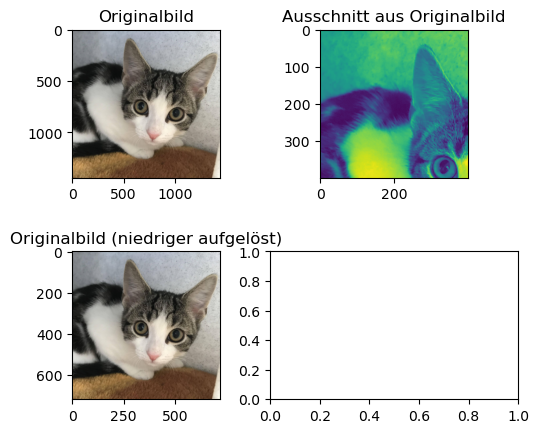

In [79]:
import torch
import numpy as np
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

t = torch.tensor(np.arange(0,100).reshape((10,10))).to(torch.float)
t_transpose = t.t()

print('id von t:', id(t.storage()))
print('id von t transponiert:', id(t_transpose.storage()))
print('Test, ob Tensorobjekt auf ursprüngliche Daten weist:    ',id(t.storage()) == id(t_transpose.storage()))

t_u = t_transpose[1:,1:]  # erste Zeile und Spalte gelöscht
# stride, size, offset:
print('"stride" t_transpose: ',t_transpose.stride())
print('"stride" t_u: ',t_u.stride())
print('"size" t_transpose: ', t_transpose.size())
print('"size" t_u: ',t_u.size())
print('"offset" t_transpose: ', t_transpose.storage_offset())
print('"offset" t_u: ',t_u.storage_offset())

r = torch.tensor(np.identity(10))
det = np.linalg.det(r)
r_inv = torch.inverse(r)
r_t_mult = r_inv * t

img = Image.open("cat.jpg")
# Auflösung um den Faktor 2 verrringern:
width, height = img.size
img_p = width/2
img_2 = transforms.functional.resize(img, int(img_p))
# Ausschnitt aus dem niedriger aufgelöstem Bild darstellen:
transformToTensor = transforms.ToTensor()
img_tensor = transformToTensor(img_2)
#img_stride = img_tensor.stride()
img_t_s = torch.as_strided(img_tensor,(400, 400),(int(img_p),1))

f, ax = plt.subplots(2,2)

ax[0,0].imshow(img); ax[0,0].set_title('Originalbild')
ax[1,0].imshow(img_2); ax[1,0].set_title('Originalbild (niedriger aufgelöst)')
ax[0,1].imshow(img_t_s); ax[0,1].set_title('Ausschnitt aus Originalbild')

plt.subplots_adjust(wspace=0, 
                    hspace=0.5)

#transformToimage = transforms.ToPILImage()
#img_PILIMAGE = transformToimage(img_t_s)
#plt.imshow(img)
